In [36]:
#%matplotlib notebook
import json
import requests
#from config import api_key
import matplotlib.pyplot as plt
import datetime
from time import strptime
import numpy as np
import pandas as pd
import os
import csv
import re

In [37]:
cryptodatafile = 'merged_crypto_data.csv'
RawCrypto_df = pd.read_csv(cryptodatafile)

RawCrypto_df.head()


,Coin,Date,Open,High,Low,Close,Volume,Market Cap
0,bitcoin,"Feb 28, 2021",46194.02,46716.43,43241.62,45137.77,5.344389e+10,"$841,428,977,515"
1,bitcoin,"Feb 27, 2021",46344.77,48253.27,45269.03,46188.45,4.591095e+10,"$860,978,135,421"
2,bitcoin,"Feb 26, 2021",47180.46,48370.79,44454.84,46339.76,3.509680e+11,"$863,752,275,053"
3,bitcoin,"Feb 25, 2021",49709.08,51948.97,47093.85,47093.85,5.450657e+10,"$877,766,126,138"
4,bitcoin,"Feb 24, 2021",48835.09,51290.14,47213.50,49705.33,6.369552e+10,"$926,393,090,751"


In [38]:
# Function to convert "Date" to usable / sortable format 
def monthToNum(shortMonth):
    return {
            'jan' : 1,
            'feb' : 2,
            'mar' : 3,
            'apr' : 4,
            'may' : 5,
            'jun' : 6,
            'jul' : 7,
            'aug' : 8,
            'sep' : 9, 
            'oct' : 10,
            'nov' : 11,
            'dec' : 12
    }[shortMonth]
splitdate = pd.DataFrame()
splitdate[['month','day','year']] = RawCrypto_df['Date'].str.split("\s|,", 2, expand=True)
splitdate['month'] = splitdate['month'].str.lower()
splitdate['month'] = splitdate['month'].apply(monthToNum)

# Insert Datestamp YYYMMDD Column for sorting 
RawCrypto_df.insert(1,'Datestamp',pd.to_datetime(splitdate[['year','month','day']]))
RawCrypto_df

,Coin,Datestamp,Date,Open,High,Low,Close,Volume,Market Cap
0,bitcoin,2021-02-28,"Feb 28, 2021",46194.02,46716.43,43241.62,45137.77,5.344389e+10,"$841,428,977,515"
1,bitcoin,2021-02-27,"Feb 27, 2021",46344.77,48253.27,45269.03,46188.45,4.591095e+10,"$860,978,135,421"
2,bitcoin,2021-02-26,"Feb 26, 2021",47180.46,48370.79,44454.84,46339.76,3.509680e+11,"$863,752,275,053"
3,bitcoin,2021-02-25,"Feb 25, 2021",49709.08,51948.97,47093.85,47093.85,5.450657e+10,"$877,766,126,138"
4,bitcoin,2021-02-24,"Feb 24, 2021",48835.09,51290.14,47213.50,49705.33,6.369552e+10,"$926,393,090,751"
...,...,...,...,...,...,...,...,...,...
26277,waves,2016-06-07,"Jun 07, 2016",0.77,1.08,0.77,0.84,4.593200e+04,$0
26278,waves,2016-06-06,"Jun 06, 2016",0.71,1.17,0.71,0.77,9.557300e+04,$0
26279,waves,2016-06-05,"Jun 05, 2016",0.59,1.11,0.58,0.71,4.170000e+04,$0
26280,waves,2016-06-04,"Jun 04, 2016",1.09,1.29,0.58,0.59,4.912000e+03,$0


In [ ]:
# DEPRECATED
# ethereum_df = RawCrypto_df.loc[RawCrypto_df['Coin'] == 'ethereum'].sort_values(by='Datestamp')
# litecoin_df = RawCrypto_df.loc[RawCrypto_df['Coin'] == 'litecoin'].sort_values(by='Datestamp')
# bitcoin_df = RawCrypto_df.loc[RawCrypto_df['Coin'] == 'bitcoin'].sort_values(by='Datestamp')
# iota_df = RawCrypto_df.loc[RawCrypto_df['Coin'] == 'iota'].sort_values(by='Datestamp')
# monero_df = RawCrypto_df.loc[RawCrypto_df['Coin'] == 'monero'].sort_values(by='Datestamp')
# dash_df = RawCrypto_df.loc[RawCrypto_df['Coin'] == 'dash'].sort_values(by='Datestamp')



In [39]:
coinlist = ['bitcoin','ethereum','litecoin','iota','monero','dash']
tier1_coinlist = ['bitcoin']
tier2_coinlist = ['ethereum','litecoin']
tier3_coinlist = ['iota','dash','monero','waves','stratis']

<Figure size 432x288 with 0 Axes>

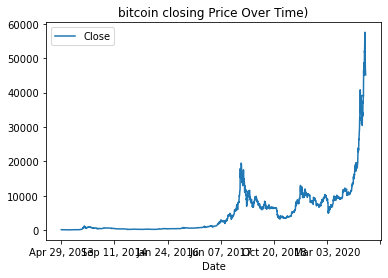

<Figure size 432x288 with 0 Axes>

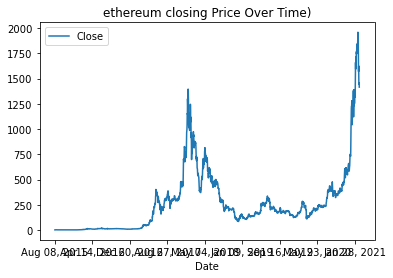

<Figure size 432x288 with 0 Axes>

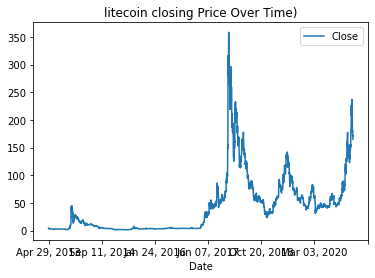

<Figure size 432x288 with 0 Axes>

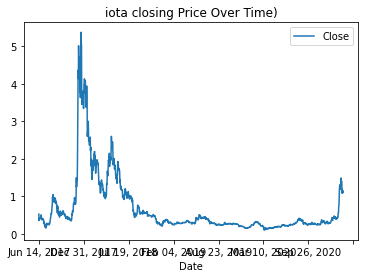

<Figure size 432x288 with 0 Axes>

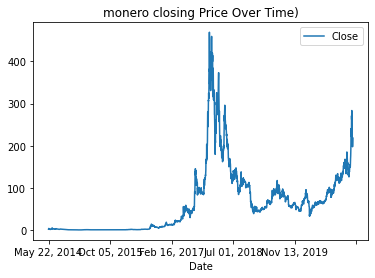

<Figure size 432x288 with 0 Axes>

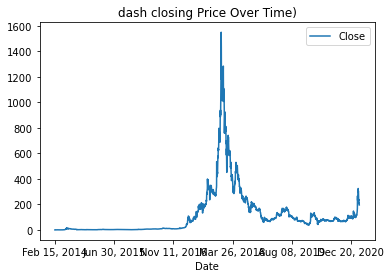

In [40]:
for coin in coinlist:
    plt.figure()
    exec(f"{coin}_df.plot('Date','Close')")
    exec(f"plt.title('{coin} closing Price Over Time)')")

plt.show()

In [ ]:
# DEPRECATED
# # bitcoin_groupbymonth_df = bitcoin_df.groupby(pd.Grouper(key='Datestamp',freq='1M'))
# plt.plot(bitcoin_groupbymonth_df[['High']].std())
# plt.title('Standard Deviation of Monthly High/Low prices')

In [ ]:
# DEPRECATED
# plt.plot(bitcoin_groupbymonth_df[['Low',]].min())
# plt.plot(bitcoin_groupbymonth_df[['High']].max())
# plt.title('Lowest and Highest Prices By Month')
# plt.show()

In [ ]:
# DEPRECATED
# delta = ethereum_groupbymonth_df['High'].max()
# delta = pd.DataFrame(delta)
# delta['Low'] = ethereum_groupbymonth_df['Low'].min()
# delta['Delta'] = delta['High'] - delta['Low']
# plt.plot(delta['High'], color = 'red')
# plt.plot(delta['Low'], color = 'red')
# delta['x1'] = delta.index
# plt.fill_between(x=delta['x1'], y1=delta['Low'], y2=delta['High'], color = 'red')
# plt.title("Difference between a month's Highest and Lowest price")


In [41]:
# First Coin Loop 

for coin in coinlist:
    # create multiple dataframes for coins, sort by date 
    globals()[f"{coin}_df"] = RawCrypto_df.loc[RawCrypto_df['Coin'] == coin].sort_values(by='Datestamp')
    # create mutliple groupby tables 
    exec(f"{coin}_groupbymonth_df = {coin}_df.groupby(pd.Grouper(key='Datestamp',freq='1M'))")



In [ ]:
for coin in coinlist:
    plt.figure()
    exec(f"plt.plot({coin}_groupbymonth_df[['Close']].mean())")
    exec(f"plt.title('Mean of {coin} Monthly Close prices')")    

In [ ]:
for coin in coinlist:
    plt.figure()
    exec(f"plt.plot({coin}_groupbymonth_df[['High']].std())")
    exec(f"plt.title('Standard Deviation of {coin} Monthly High/Low prices')")

In [ ]:
for coin in coinlist:
    plt.figure()
    exec(f"plt.plot({coin}_groupbymonth_df[['High']].var())")
    exec(f"plt.title('Variance of {coin} Monthly High/Low prices')")  

In [ ]:
for coin in coinlist:
    exec(f"{coin}_delta = {coin}_groupbymonth_df['High'].max()")
    exec(f"{coin}_delta = pd.DataFrame({coin}_delta)")
    exec(f"{coin}_delta['Low'] = {coin}_groupbymonth_df['Low'].min()")
    exec(f"{coin}_delta['HighLowDelta'] = {coin}_delta['High'] - {coin}_delta['Low']")
    exec(f"{coin}_delta['Close'] = {coin}_groupbymonth_df['Close'].max()")
    exec(f"{coin}_delta['CloseDiff'] = {coin}_delta['Close'].diff()")
    exec(f"{coin}_delta['PctChange'] = ({coin}_delta['CloseDiff']) / ({coin}_delta['Close'] - {coin}_delta['CloseDiff']) * 100 ")    
    plt.figure()
    exec(f"plt.plot({coin}_delta['High'], color = 'red')")
    exec(f"plt.plot({coin}_delta['Low'], color = 'red')")
    exec(f"{coin}_delta['x1'] = {coin}_delta.index")
    exec(f"plt.fill_between(x={coin}_delta['x1'], y1={coin}_delta['Low'], y2={coin}_delta['High'], color = 'red')")
    exec(f"plt.title('{coin} Monthly Highest vs Lowest price')")   


In [ ]:
for coin in coinlist:
    plt.figure()
    exec(f"plt.plot({coin}_delta[['PctChange']])")
    exec(f"plt.title('% Change of {coin} Monthly Mean Close prices')")
    plt.xlabel('Timepoint')
    plt.ylabel('% Increase / Decrease')
    plt.ylim(-60,250)
    plt.axhline(y=0, color = 'black', linewidth = .5)